In [1]:
from sokoban import Map, save_images, create_gif
from search_methods.beam_search import BeamSearch
from search_methods.lrta_star import LrtaStar
from search_methods.heuristics import min_weight_manhattan
from search_methods.heuristics import min_weight_manhattan_with_player
from search_methods.heuristics import min_weight_bfs
from search_methods.heuristics import min_weight_bfs_with_player
from search_methods.heuristics import min_weight_euclidean as euclid
import matplotlib.pyplot as plt

# euristicile care ofera penalty-uri atunci cand ne indepartam de vreon cutie
# sunt folosite in lrta_star in special


# Inits
- Starter maps are found in /images/init_maps

In [2]:
""" 
	Store the maps from the .yaml files, organizing them in a map based on their
	advertised difficulty level. 
	Each key will have a corresponding tuple containing the map object and its name as a string
"""
EASY = 'easy'
MEDIUM = 'medium'
HARD = 'hard'
SUPER_HARD = 'super_hard'
LARGE = 'large'
MAP = 1
MAP_NAME = 0

heuristics = [euclid, min_weight_manhattan, min_weight_manhattan_with_player, min_weight_bfs, min_weight_bfs_with_player]

def create_steps_images(steps_path, map_name, heur_name, algo_name):
	""" 
		Creates images for each step in the solution and returns their path
	"""
	for i in range(len(steps_path)):
		map = steps_path[i]
		map.save_map(f'images/{map_name}/{algo_name}/{heur_name}/steps', f'{str(i)}')
	return f'images/{map_name}/{algo_name}/{heur_name}/steps'

maps = {}
for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	maps[difficulty] = []
	for i in range(1, 3):
		# There's only one super_hard map
		if difficulty == 'super_hard' and i == 2:
			continue
		map_name = f'{difficulty}_map{str(i)}'
		map_tuple = (map_name, Map.from_yaml(f'tests/{map_name}.yaml'))
		maps[difficulty].append(map_tuple)

for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	for map_tuple in maps[difficulty]:
		map = map_tuple[MAP]
		# remove the .yaml extension
		map_name = map_tuple[MAP_NAME].replace('.yaml', '')
		map.save_map('images/init_maps', map_name)

# Beam-Search

In [3]:
print('#=======================================================================#')

beam_search_explored_states = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			beam_width = 15
			solver = BeamSearch(map_tuple[MAP], beam_width, heuristic, allow_pulls=False)
			print(f"------------ Heuristic: {heuristic.__name__} ----------")
			# time the solver
			%time solution_path = solver.solve()
			if solution_path is not None:
				print(f"map: {map_tuple[MAP_NAME]}")
				print(f"Beam width: {beam_width}")
				print(f'Total pull moves: {str(solution_path[-1].undo_moves)}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "beam_search")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not beam_search_explored_states.get(map_tuple[MAP_NAME]):
					beam_search_explored_states[map_tuple[MAP_NAME]] = []
				beam_search_explored_states[map_tuple[MAP_NAME]].append(solver.explored_states)
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')


print('#=======================================================================#')

#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 169
Reconstructed path size: 20
CPU times: total: 0 ns
Wall time: 0 ns
map: easy_map1
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 92
Reconstructed path size: 10
CPU times: total: 15.6 ms
Wall time: 17.2 ms
map: easy_map2
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 251
Reconstructed path size: 22
CPU times: total: 62.5 ms
Wall time: 49.4 ms
map: medium_map1
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------

# LRTA*

In [4]:
print('#=======================================================================#')

lrta_star_total_steps = {}
lrta_star_pull_moves = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			solver = LrtaStar(map_tuple[MAP], heuristic, allow_pulls=True)
			print(f"------------ Heuristic: {heuristic.__name__} -----------")
			# time the solver
			%time solution_path = solver.solve()
			if solution_path is not None:
				print(f"Map: {map_tuple[MAP_NAME]}")
				print(f"Total steps: {len(solution_path)}")
				print(f'Total pull moves: {solution_path[-1].undo_moves}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "lrta_star")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not lrta_star_total_steps.get(map_tuple[MAP_NAME]):
					lrta_star_total_steps[map_tuple[MAP_NAME]] = []
				lrta_star_total_steps[map_tuple[MAP_NAME]].append(len(solution_path))
				if not lrta_star_pull_moves.get(map_tuple[MAP_NAME]):
					lrta_star_pull_moves[map_tuple[MAP_NAME]] = []

				lrta_star_pull_moves[map_tuple[MAP_NAME]].append(solution_path[-1].undo_moves)
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')

print('#=======================================================================#')



#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
CPU times: total: 0 ns
Wall time: 7 ms
Map: easy_map1
Total steps: 50
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
CPU times: total: 0 ns
Wall time: 2.18 ms
Map: easy_map2
Total steps: 18
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
CPU times: total: 109 ms
Wall time: 107 ms
Map: medium_map1
Total steps: 567
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
CPU times: total: 141 ms
Wall time: 132 ms
Map: medium_map2
Total steps: 941
Total p

# Plots

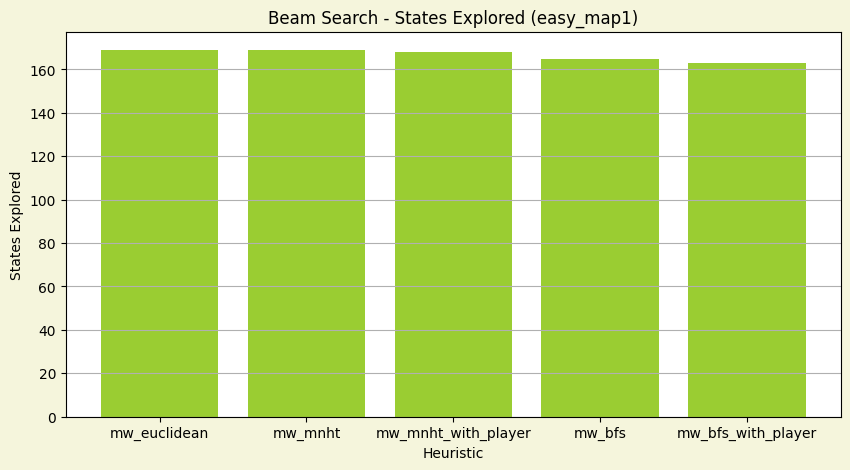

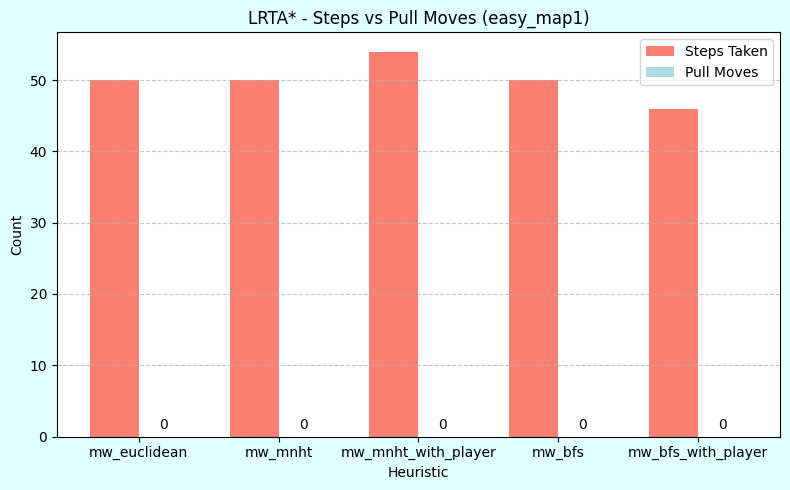

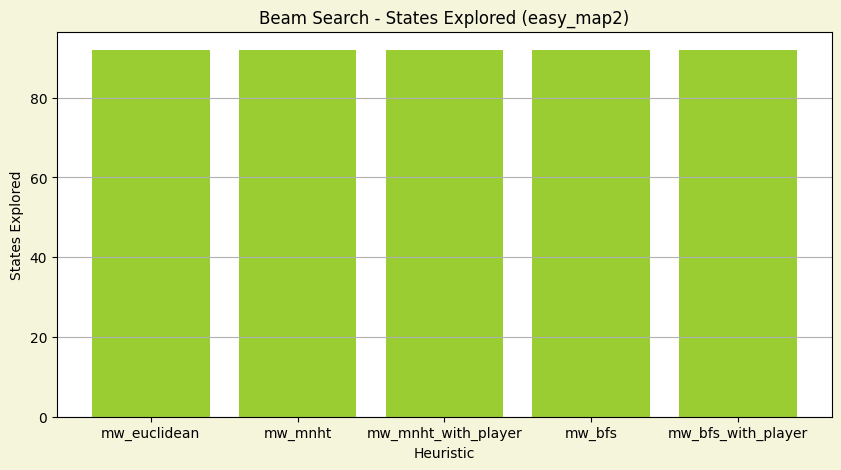

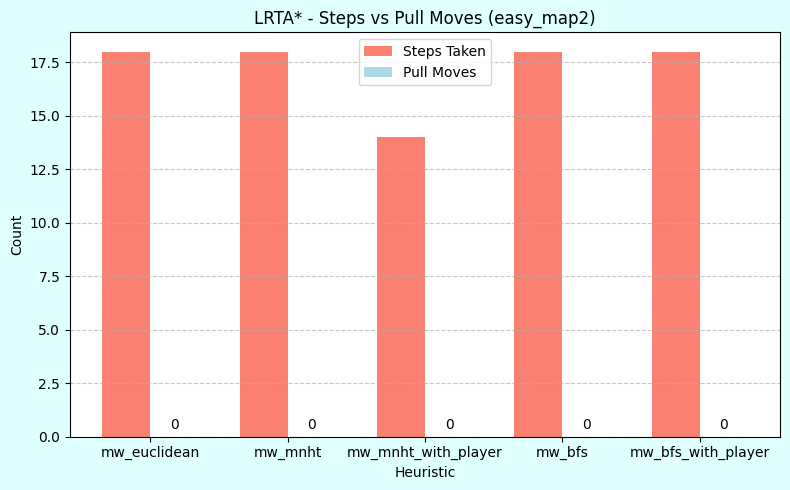

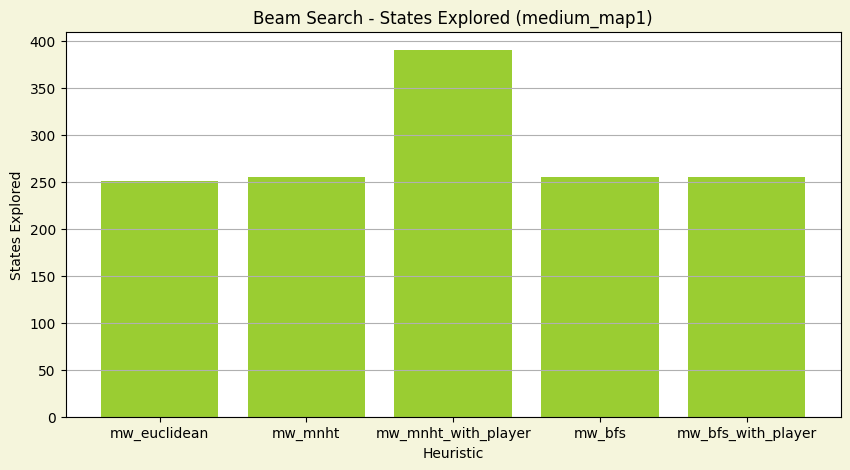

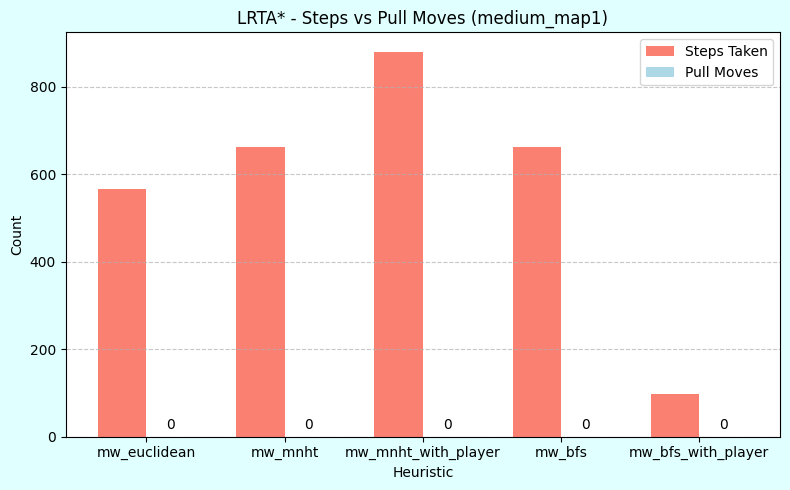

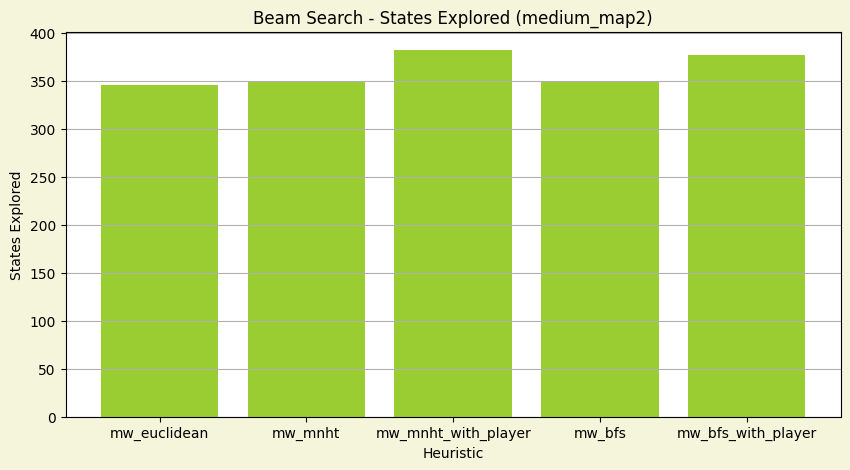

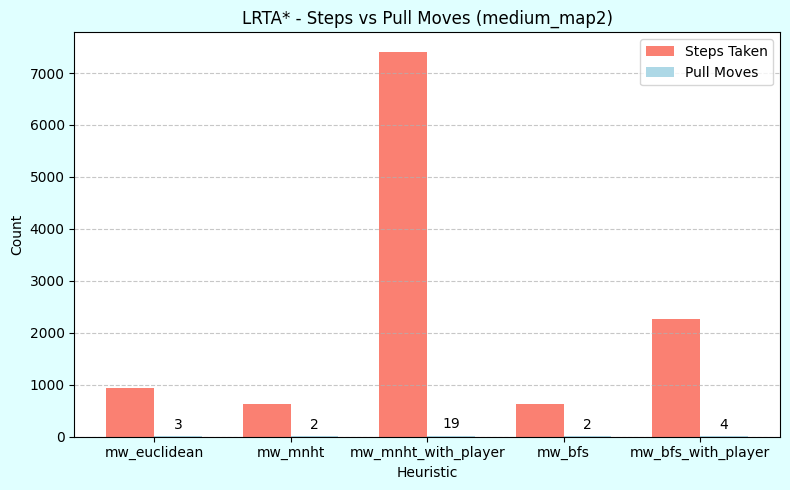

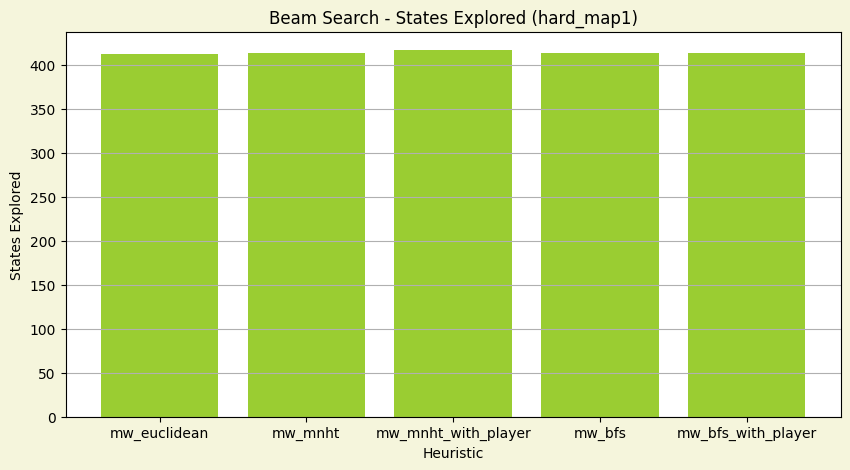

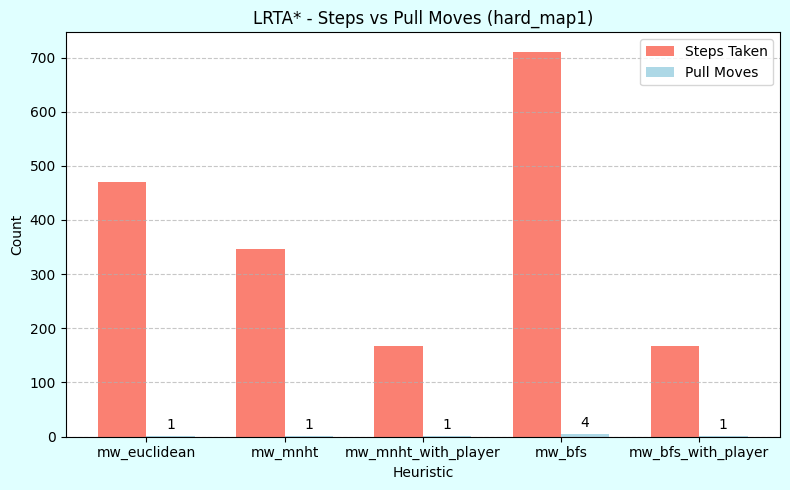

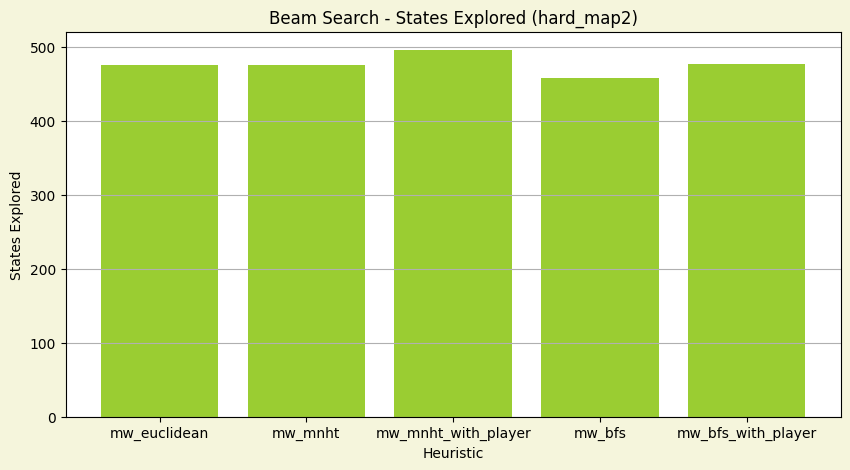

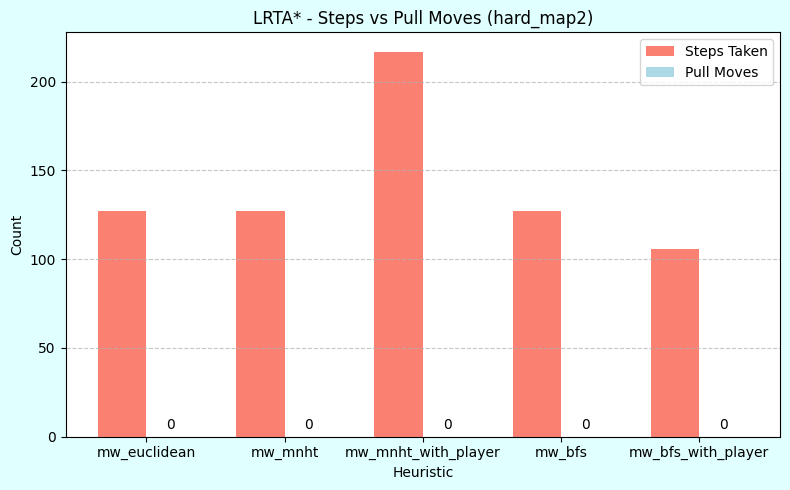

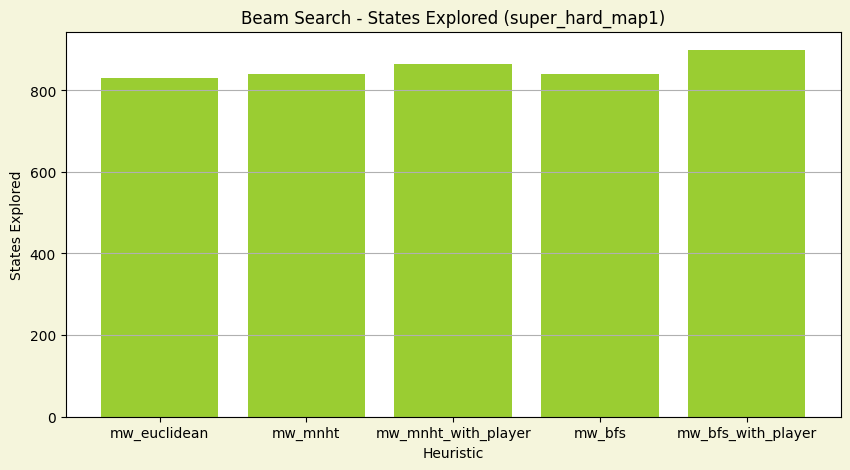

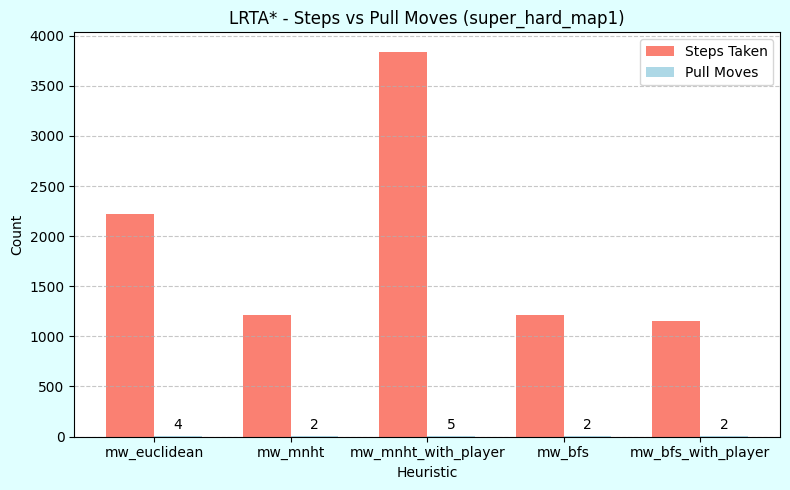

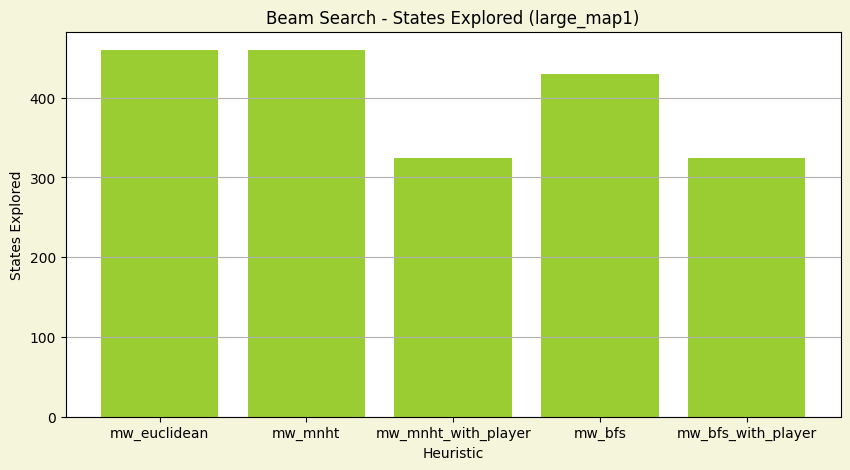

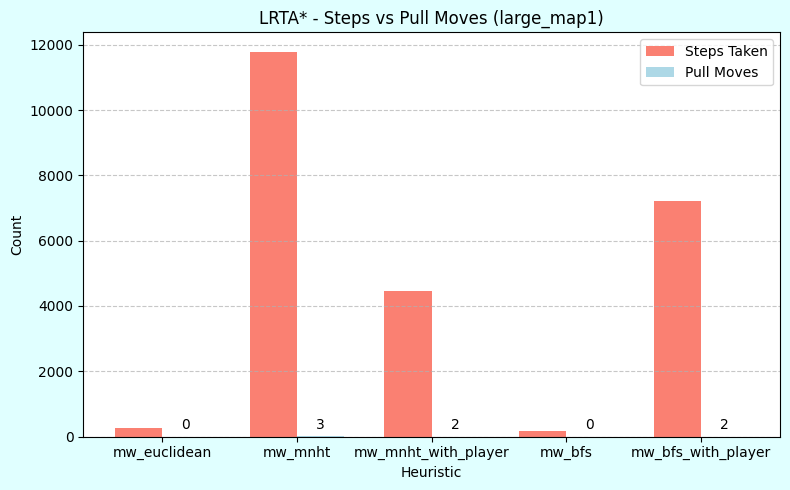

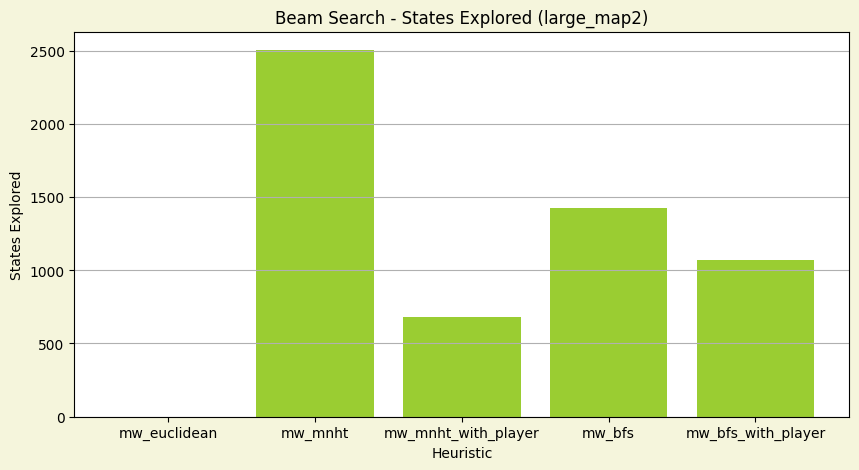

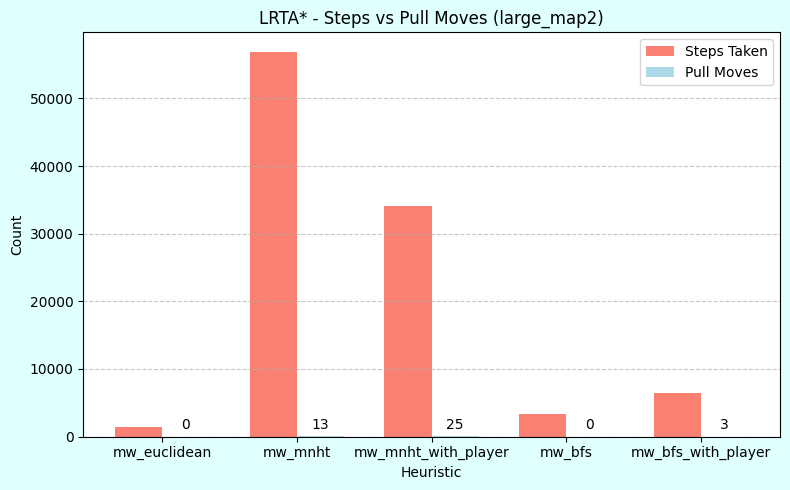

In [5]:
maps = ["easy_map1", "easy_map2", "medium_map1", "medium_map2", "hard_map1", "hard_map2", "super_hard_map1", "large_map1", "large_map2"]
import numpy as np
num_heuristics = len(heuristics)
# shorten names, so they fit in the graph
heuristics_names = [shorter.replace('manhattan', 'mnht') for shorter in [h.__name__.replace('min_weight', 'mw') for h in heuristics]]
for map_name in maps:
	# --- Beam Search (Explored States) ---
	fig, ax = plt.subplots(figsize=(10,5))
	fig.patch.set_facecolor('beige')      # figure background (outside the graph)
	ax.set_facecolor('white')             # plot background (inside the graph)

	ax.bar(heuristics_names, beam_search_explored_states[map_name], color='yellowgreen')
	ax.set_title(f'Beam Search - States Explored ({map_name})')
	ax.set_xlabel('Heuristic')
	ax.set_ylabel('States Explored')
	ax.grid(axis='y')
	plt.show()

	step_counts = lrta_star_total_steps[map_name]
	pull_counts = lrta_star_pull_moves[map_name]

	# --- LRTA* (Steps & Pull Moves) ---
	x = np.arange(num_heuristics)
	width = 0.35

	fig_lrta, ax_lrta = plt.subplots(figsize=(8, 5))
	fig_lrta.patch.set_facecolor('lightcyan')
	ax_lrta.set_facecolor('white')


	rects1 = ax_lrta.bar(x - width/2, step_counts, width, label='Steps Taken', color='salmon')
	rects2 = ax_lrta.bar(x + width/2, pull_counts, width, label='Pull Moves', color='lightblue')

	ax_lrta.set_ylabel('Count')
	ax_lrta.set_title(f'LRTA* - Steps vs Pull Moves ({map_name})')
	ax_lrta.set_xticks(x)
	ax_lrta.set_xticklabels(heuristics_names)
	ax_lrta.set_xlabel('Heuristic')
	ax_lrta.legend()
	ax_lrta.grid(axis='y', linestyle='--', alpha=0.7)

	ax_lrta.bar_label(rects2, padding=3)

	fig_lrta.tight_layout()
	plt.show()